# Survival Game - <font size=4 color='gray'>Alexander Bruun, Anton Paris </font>
# <font color='gray'>Code for the simulation </font>
Based on Leonel Aguilar's 2D Cellular Automata


___

### Import Libraries

In [39]:
import numpy as np #matrix and vector library
import matplotlib.pyplot as plt #plotting library
from random import shuffle
import random 



### Define plots to be inlined

In [40]:
#Jupyter magic that makes plots to be inlined in the notebook
%matplotlib inline 

### Create object Cell

In [41]:
#TO DO 
    #__init__ calls function, based on cell type  for initialicing?

In [42]:
##Add attributes here 


class Cell():
    def __init__(self, type_cell, lifespan, nutrition_level ):
        self.type_cell = type_cell
        self.lifespan = lifespan 
        self.nutrition_level= nutrition_level
        
        
    def increase_l (self, value):
        self.lifespan+= value      
        
    def death (self):
        self.lifespan=0
        self.type_cell=0 #forest
                 
    def eat (self, value):
        self.nutrition_level+= value
        
    def get_type (self):
        return self.type_cell
    
    
    
        
    def set_movement(self, cells, coords_1, coords_2, increase_value_lifespan, increase_value_eat):
        
        #consuming resosursses 
        print(coords_1,coords_2)
        cells[coords_1[0]][coords_1[1]].increase_l(increase_value_lifespan)
        cells[coords_1[0]][coords_1[1]].eat(increase_value_eat)
        ##needs more attributes
        
        cells[coords_2[0]][coords_2[1]]=cells[coords_1[0]][coords_1[1]]
        #cells[coords_1[0]][coords_1[1]].death()
        
        
        
        
        
   
        
        
   

        

        

In [43]:
def  get_value_eat(states,coords):
    if states[coords[0]][coords[1]].type_cell >=0:
        return 3

###  Build 2D List 

In [44]:
#empty grid
#POST: array created with [rows][colums]
def initGrid(cols,rows,array):
    
    for i in range (rows):
        array.append([1])
        
        for j in range (cols):
            array[i].append(0)
      
            
              

### Fill grid randoly with desired range 

In [45]:
# TO DO 
#specific attribute adding mechanism 
#OVERVIEW attributes 

In [46]:
#0 forest, 1 wolves
#POST: fills Grid with random numbers and the right attributes 
def fillGrid(rows,cols,array):
    
    for i in range (rows):
        for j in range (cols):
                  array[i][j]= Cell(random.randint(0,2),0,100) #atrribute 

##### forest= 0, wolves = 1, rabbits = 2 


In [47]:
# TO DO 
    # RULES SET 
    #... 

In [48]:
global r_dim, c_dim, cells #Dimension of the 1D cells space
r_dim= 10 
c_dim= 10 
 #creating empty cells
cells=[]


In [49]:
initGrid(r_dim, c_dim, cells)
fillGrid(r_dim, c_dim, cells)


In [50]:
cells[1][2].type_cell

1

In [51]:
#create a new updated matrix with only the cell types  
#Post: returns 2D array[row][columns] with the current states of the cells, 
def update_grid(r_dim,c_dim,cells):
    type_cell_array=np.zeros((r_dim,c_dim))
    for i in range(r_dim):
        for j in range(c_dim):
          type_cell_array[i][j]= cells[i][j].type_cell
            
    return type_cell_array

In [52]:
cells_m_type=update_grid(r_dim, c_dim, cells)

In [53]:
cells_m_type

array([[0., 2., 1., 1., 2., 0., 1., 1., 2., 2.],
       [1., 0., 1., 0., 0., 1., 2., 0., 1., 0.],
       [1., 0., 0., 0., 2., 0., 0., 0., 0., 2.],
       [0., 1., 0., 0., 1., 1., 0., 2., 2., 0.],
       [0., 0., 1., 1., 2., 0., 1., 2., 2., 2.],
       [1., 2., 1., 1., 0., 0., 1., 1., 1., 2.],
       [2., 1., 2., 0., 0., 1., 0., 1., 1., 2.],
       [2., 0., 1., 0., 1., 0., 2., 2., 2., 1.],
       [0., 2., 2., 0., 1., 2., 1., 0., 0., 1.],
       [0., 2., 0., 2., 0., 1., 1., 1., 0., 1.]])

In [54]:
def PlotAutomataHistory(cellHistory,ax=None):
    """
    """
    #cellHistory=cellHistory.transpose()
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5)) #Determine the number of subplots in the figure and its size (scaling)
    
    minVal=0
    maxVal=2
    
    cmap = plt.cm.gray
    norm = plt.Normalize(minVal,maxVal)
    rgba = cmap(norm(cellHistory))
    #Coloring of the group 
    S = np.argwhere(cellHistory==0)
    I = np.argwhere(cellHistory==1)
    R = np.argwhere(cellHistory==2)
    W = np.argwhere(cellHistory==3)
    
    red=[1,0,0]
    green=[0,1,0]
    blue=[0,0,1]
    yellow=[1,1,0]
    
    for position,color in zip([S,I,R,W],[red,green,blue,yellow]):
        for pos in position:
            rgba[pos[0]][pos[1],:3]=color
    
    
    ax.imshow(rgba,origin='lower', interpolation='none') #Type of plot 
    #Axis labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    
    #Major ticks frequency
    mTickNum=1
    xNum=1 #int(cellHistory.shape[0]/mTickNum)
    yNum=1 #int(cellHistory.shape[1]/mTickNum)+1
         
    #Major ticks
    ax.set_xticks(np.arange(0, cellHistory.shape[0], xNum))
    ax.set_yticks(np.arange(0, cellHistory.shape[1], yNum))
    
    #Major tick labels
    ax.set_xticklabels(np.arange(0, cellHistory.shape[0]+1, xNum))
    ax.set_yticklabels(np.arange(0, cellHistory.shape[1]+1, yNum))
    
    # Minor ticks
    ax.set_xticks(np.arange(-.5, cellHistory.shape[0], 1), minor=True);
    ax.set_yticks(np.arange(-.5, cellHistory.shape[1], 1), minor=True)
    

    
    #Add grid
    #Gray line separates cells
    ax.grid(which='minor', axis='x', color='gray', linestyle='-', linewidth=2)
    #Red line separates generations
    ax.grid(which='minor', axis='y', color='gray', linestyle='-', linewidth=2)
    #ax.set_axis_off()

### Plot initial state

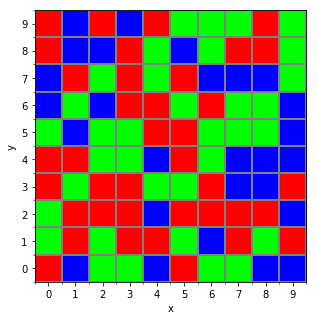

In [55]:
PlotAutomataHistory(cells_m_type)
#cells.shape



### Define a function that applies the rule

In [56]:
def filteringstate(mystate, neighstate, rules): #rule [mystate, states allowed to interact]
    filter_states=rules[mystate]
    filtered_neighstate=[]
    print(filter_states)
    
    for possible in filter_states:
        for neigh in neighstate:
            if possible == neigh[0]:
                filtered_neighstate.append([neigh[1],neigh[2]])
    return filtered_neighstate
            
    
    
    

In [2]:
def apply_rule(mystate,mycoords, neighstate, grid, rules, cells):
    
    
    #filterstate
    #offspring..
    print(len(neighcoord))
    neighcoord=filteringstate(mystate, neighstate, rules)

    number=(np.random.randint(0,len(neighcoord))
    #print(neighcoord[number],"number")
    if mystate==0:
            return mycoords, 0 
    
    elif mystate==1:
            value_eat=get_value_eat(grid, neighcoord[number])
            #print(neighcoord[number],"mystate1")
            return neighcoord[number], value_eat
    else:    
            return mycoords,3
        
  

SyntaxError: invalid syntax (<ipython-input-2-63a888eab452>, line 10)

### Define Neighborhood

In [ ]:
#Takes an idx out of all_idx (shuffled) 
    #calculates the coordinates of a cell based on the idx
    #calculates it's neighborhood periodic boundaries 
    #creates neighstate, [state, row coordinate, column coordinates]
    #returns mycoords, mystate, neighstate 

In [ ]:
def idxToCoordinates(idx,x_dim):
    return [idx%x_dim,idx//x_dim]

def getNeighbourhood(idx, x_dim, y_dim):
    neighb = []
    coords = idxToCoordinates(idx, x_dim)
    for j in range(-1, 2, 1):
        for i in range(-1, 2, 1):
            # Handle boundary conditions
            neighb.append([(coords[0] + i)%(x_dim), (coords[1] + j)%(y_dim)])
    #print (coords, neighb)
    return (coords, neighb)

def getNeighbourhoodValues(idx, grid, x_dim, y_dim):
    mycoords,neighCoords=getNeighbourhood(idx, x_dim, y_dim)
    
    mystate=grid[mycoords[0]][mycoords[1]].type_cell
    neighstate=[]
    
    for neighc in neighCoords:
      
        
        #Problem recursion of own coordinates (TO DO) #fid
        if (neighc[0] != mycoords[0] or neighc[1] != mycoords[1]):
          
            neighstate.append([grid[neighc[0]][neighc[1]].type_cell, neighc[0], neighc[1]])
        
    #print("- Coords ",mycoords," = ",mystate," neigs ",neighstate," = ",neighCoords)
    print(mycoords,neighstate)
    return mycoords,mystate,neighstate

                                                                         

In [ ]:
#filter neighstate only the important states out 

### Define the step Function


In [ ]:
#input: state (2D Matrix)
# all_idx is used for the iteration through the grid, (random)

#input is the current state (map with only the cell type information )


In [ ]:
def step(state,rules, cells):
    """Every timestep the state of the new generation of cells is determined by 
    the previous generation neighborhood
    Input: current state of all cells (state)
    Output: next state of all cells (new_state) 
    """
    
    all_idx = np.arange(0, r_dim*c_dim, 1)
    
    shuffle(all_idx)
    
    #Iterate through all cells (C) in the automata and extract its neighbourhood
    for idx in all_idx:
        #print("cell ",mycoords)
        mycoords,mystate,neighstate = getNeighbourhoodValues(idx,state,r_dim,c_dim)
        #print("cell ",idx," - ",mycoords)

        neighcoord, value_eat=apply_rule(mystate,mycoords, neighstate, state, rules, cells)
        #def set_movement(self, cells, coords_1, coords_2, increase_value_lifespan, increase_value_eat):
        cells[mycoords[0]][mycoords[1]].set_movement(cells,mycoords,neighcoord,1,value_eat)
        
    state=update_grid(r_dim,c_dim,cells)
    print(state,"state", cells[5][4].type_cell, "cells")
    return state

### Define the simulation

In [ ]:
#uses step max_step times and 
#step needs to only output 

In [ ]:
def simulation(X,max_steps):
    """Traces the whole evolution of an initial state X through max_steps generations
    Input: X, initial state
    Output: cells_stack.transpose(), matrix stacking the cells state after each timestep 
    """
  
    rules= [[0],[0],[1,0]]
    
   
    cells_stack=[X]
    new_state=X
    #            #print(coords[0]+i," - ",coords[1]+j)Move one step forward max_step times
    for i in range(max_steps):
        #Moves one step forward
        new_state=step(new_state,rules,X)
        #Stores the result
        cells_stack.append(new_state)
    return cells_stack
    

# Performing the simulation
___

In [ ]:
max_steps=30 #Number of timesteps
results=simulation(cells,max_steps) #Perform simulation and store its results

## Plot results

In [ ]:
PlotAutomataHistory(results[-1])

In [ ]:
### Visualize Results

import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml" #style of the plot 
from copy import deepcopy #for creating a compunt object and copying existing objects into it 
import pandas as pd



In [ ]:
%%capture
# Build plot
fig, ax = plt.subplots(figsize=(6,4))
resultsCopy= deepcopy(results)

def animate(j):
    ax.clear()
    PlotAutomataHistory(results[j],ax=ax)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(results))

In [ ]:
ani

In [ ]:
stacked=[result.flatten() for result in results]

In [ ]:
df = pd.DataFrame(stacked)

In [ ]:
S = df[df==0].count(axis='columns')
I = df[df==1].count(axis='columns')
R = df[df==2].count(axis='columns')
W = df[df==3].count(axis='columns')

In [ ]:
x = np.arange(0.0, max_steps+1, 1)

In [ ]:
plt.plot(x,S,'red', label='S')
plt.plot(x,I,'green', label='I')
plt.plot(x,R,'blue', label='R')
plt.plot(x,W,'yellow',label='W')
plt.xlabel('Timstep')
plt.ylabel('Count')
plt.title('Simulation results')
plt.show()

In [ ]:
# 